# Loan Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_roc_curve
import warnings
from sklearn.preprocessing import StandardScaler, RobustScaler
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train_df = pd.read_csv('train2.csv')

test_df = pd.read_csv('test2.csv')

sample_df = pd.read_csv('sample_submission.csv')

In [3]:
train_df['Source'] = 'train'

test_df['Source'] = 'test'

In [4]:
df = pd.concat([train_df, test_df], axis=0)

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Source
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,train


In [6]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Source
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN,test
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN,test
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN,test
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN,test
366,LP002989,Male,No,0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,NaN,test


In [7]:
df.info

<bound method DataFrame.info of       Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001002   Male      No          0      Graduate            No   
1    LP001003   Male     Yes          1      Graduate            No   
2    LP001005   Male     Yes          0      Graduate           Yes   
3    LP001006   Male     Yes          0  Not Graduate            No   
4    LP001008   Male      No          0      Graduate            No   
..        ...    ...     ...        ...           ...           ...   
362  LP002971   Male     Yes         3+  Not Graduate           Yes   
363  LP002975   Male     Yes          0      Graduate            No   
364  LP002980   Male      No          0      Graduate            No   
365  LP002986   Male     Yes          0      Graduate            No   
366  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0   

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Source             981 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 80.5+ KB


In [9]:
df.isna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Source
0,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,False,False,False,False,False,False,False,False,False,False,False,False,True,False
363,False,False,False,False,False,False,False,False,False,False,False,False,True,False
364,False,False,False,False,False,False,False,False,False,False,True,False,True,False
365,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [10]:
df.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
Source                 0
dtype: int64

In [11]:
df['Gender'].value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

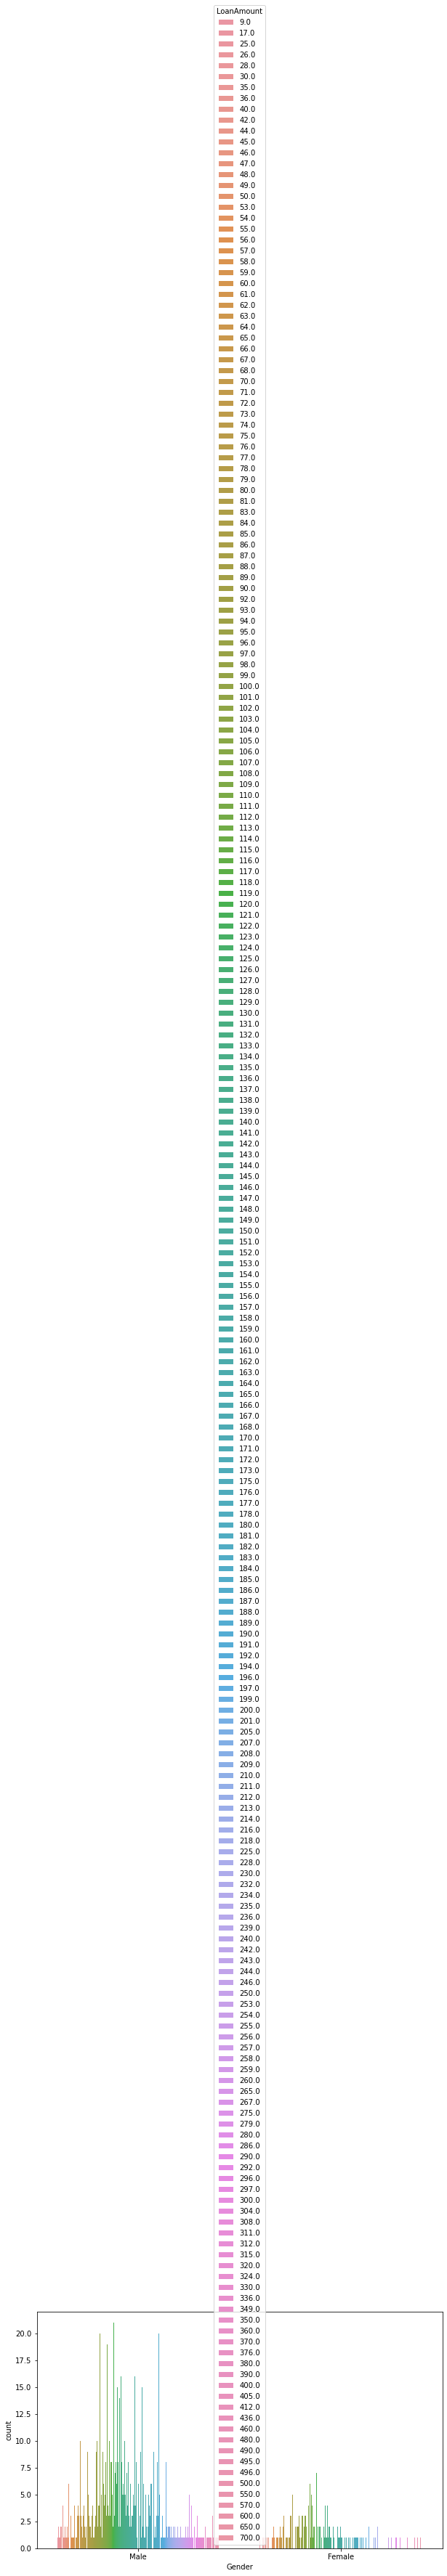

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['Gender'], hue=df['LoanAmount'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

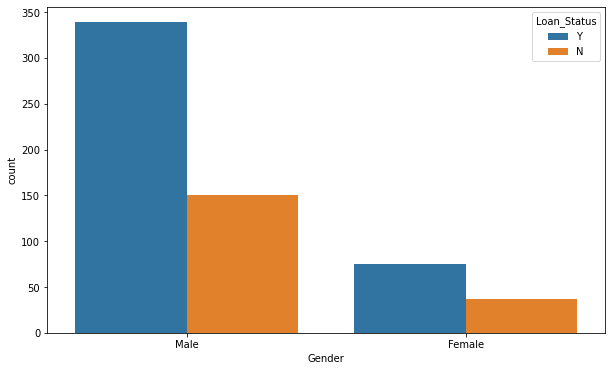

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['Gender'], hue=df['Loan_Status'])

In [14]:
df['Loan_ID'].value_counts()

LP001055    1
LP002912    1
LP002948    1
LP001878    1
LP001176    1
           ..
LP001289    1
LP002262    1
LP002554    1
LP002360    1
LP001641    1
Name: Loan_ID, Length: 981, dtype: int64

<AxesSubplot:xlabel='Loan_ID', ylabel='count'>

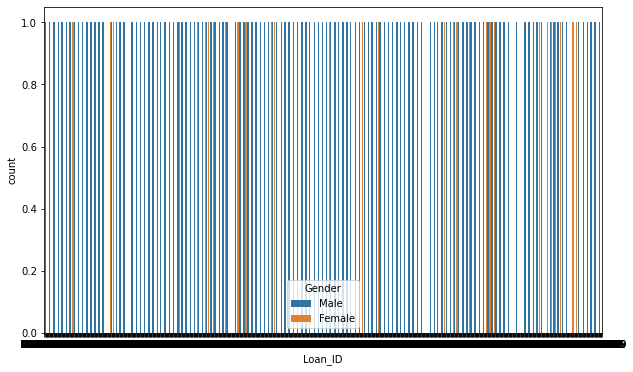

In [15]:
plt.figure(figsize =(10,6))
sns.countplot(x=df['Loan_ID'],hue=df['Gender'])

In [16]:
#plt.figure(figsize =(10,6))
#sns.distplot(df['Loan_ID'],bins =300)

In [18]:
#plt.figure(figsize =(10,6))
#sns.distplot(df['Loan_Status'],hue=df['Gender'])

In [19]:
df.Loan_ID.nunique()

981

In [20]:
df['Married'].value_counts()

Yes    631
No     347
Name: Married, dtype: int64

<AxesSubplot:xlabel='Married', ylabel='count'>

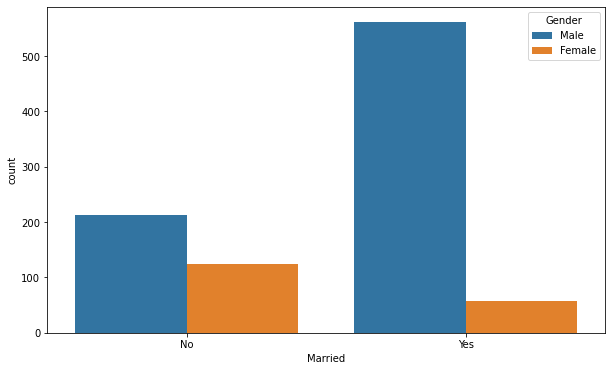

In [21]:
plt.figure(figsize =(10,6))
sns.countplot(x=df['Married'],hue=df['Gender'])

In [22]:
df['Dependents'].value_counts()

0     545
2     160
1     160
3+     91
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

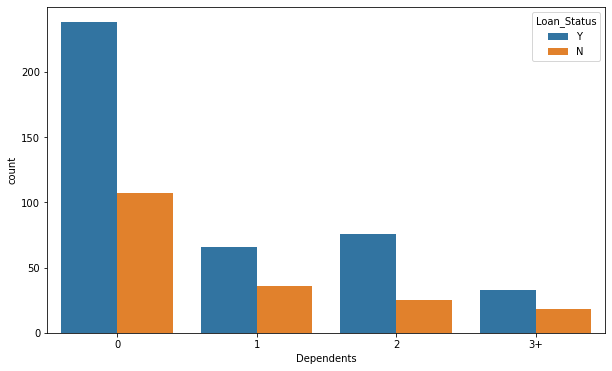

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['Dependents'], hue=df['Loan_Status'])

In [24]:
df['Education'].value_counts()

Graduate        763
Not Graduate    218
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

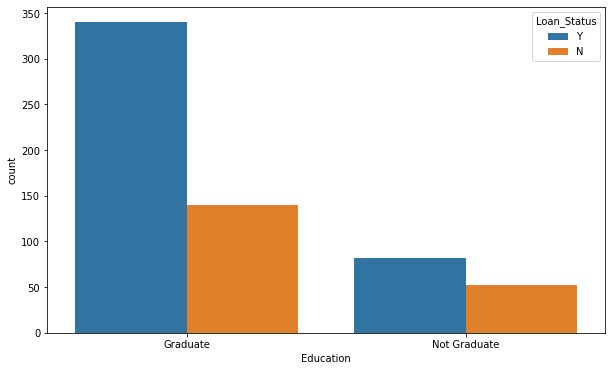

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['Education'], hue=df['Loan_Status'])

<AxesSubplot:xlabel='Education', ylabel='count'>

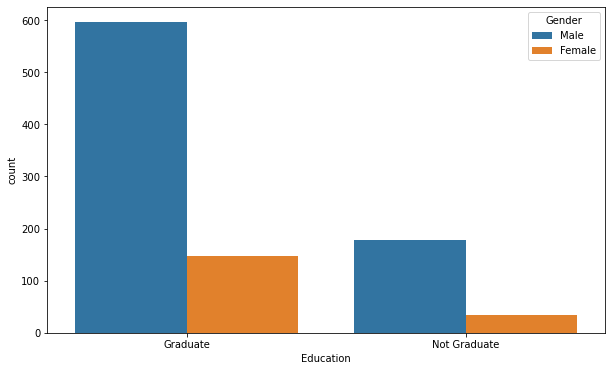

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['Education'], hue=df['Gender'])

In [27]:
df['Self_Employed'].value_counts()

No     807
Yes    119
Name: Self_Employed, dtype: int64

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

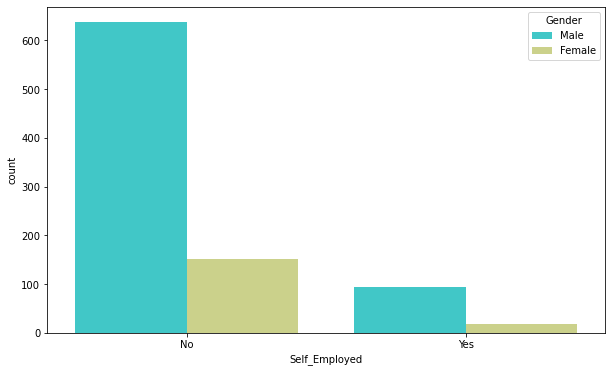

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['Self_Employed'], hue=df['Gender'] , palette = 'rainbow')

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

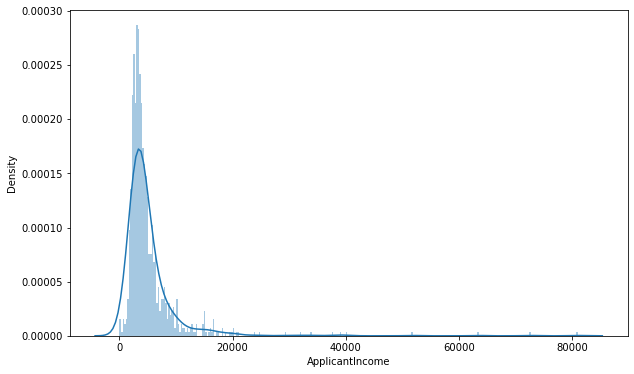

In [29]:
plt.figure(figsize=(10,6))
sns.distplot(df['ApplicantIncome'], bins = 300,)
#Applicant income follows the normal distribution

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

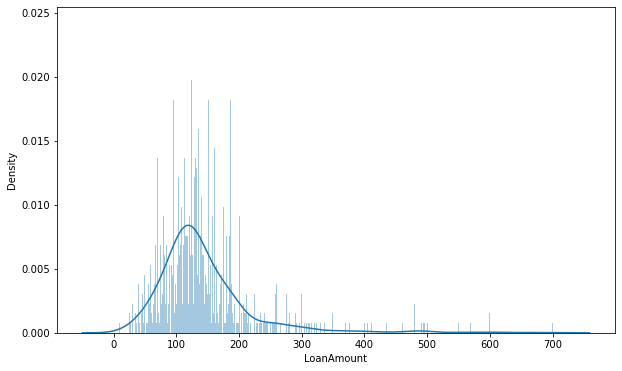

In [30]:
plt.figure(figsize=(10,6))
sns.distplot(df['LoanAmount'], bins = 500,)
#Applicant income follows the normal distribution

<AxesSubplot:xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

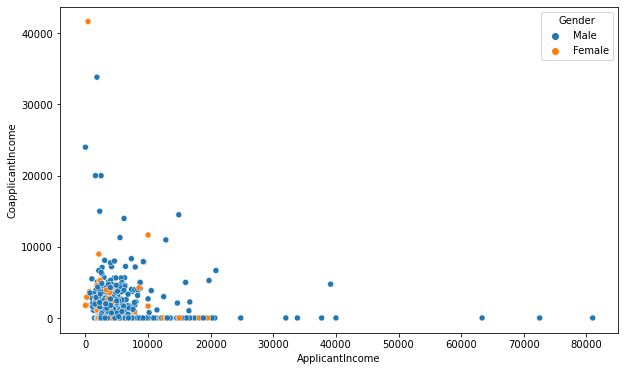

In [31]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = df['ApplicantIncome'], y = df['CoapplicantIncome'], hue=df['Gender'])

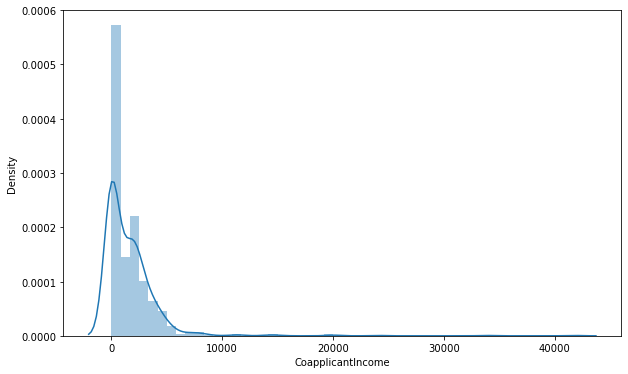

In [32]:
plt.figure(figsize=(10,6))
sns.distplot(df['CoapplicantIncome']);

In [33]:
df['CoapplicantIncome'].value_counts()

0.0       429
2500.0      6
2083.0      5
2000.0      5
2333.0      5
         ... 
1131.0      1
4700.0      1
2374.0      1
5302.0      1
3422.0      1
Name: CoapplicantIncome, Length: 437, dtype: int64

In [34]:
df['CoapplicantIncome'].value_counts().sum()

981

In [35]:
df['LoanAmount'].value_counts()

120.0    29
110.0    27
100.0    24
187.0    21
150.0    19
         ..
196.0     1
400.0     1
250.0     1
500.0     1
156.0     1
Name: LoanAmount, Length: 232, dtype: int64

In [36]:
df['LoanAmount'].value_counts().sum()

954

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

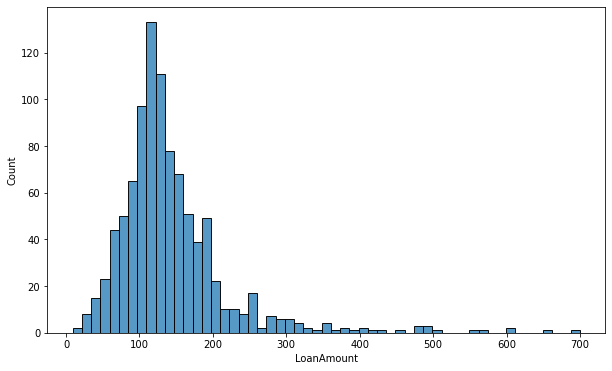

In [37]:
plt.figure(figsize=(10,6))
sns.histplot(x = df['LoanAmount'])
#Loan Amount is normally distributed

In [38]:
df['Loan_Amount_Term'].value_counts()


360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [39]:
df['Loan_Amount_Term'].value_counts().sum()

961

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

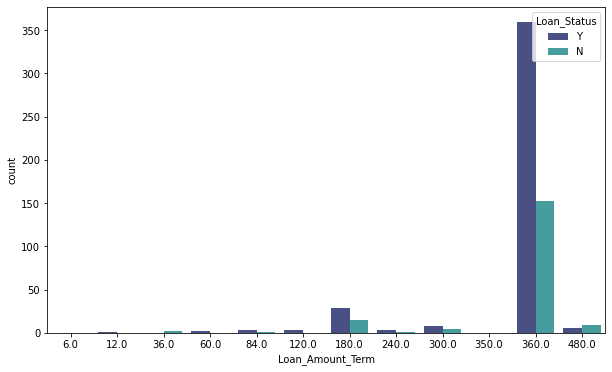

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['Loan_Amount_Term'], hue=df['Loan_Status'],palette='mako')

In [41]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [42]:
df['Loan_Status'].value_counts().sum()

614

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

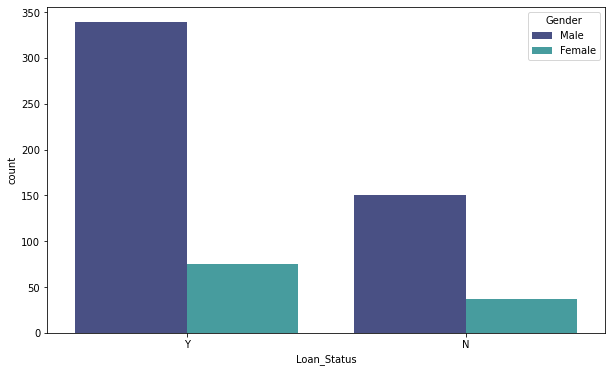

In [43]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['Loan_Status'], hue=df['Gender'],palette='mako')

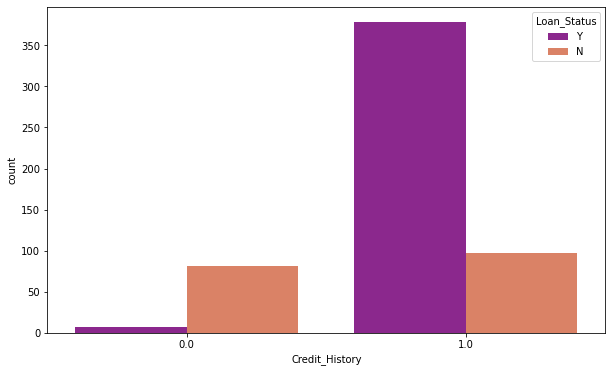

In [44]:
plt.figure(figsize=(10,6))
sns.countplot(x = df['Credit_History'], hue=df['Loan_Status'], palette='plasma');

In [45]:
df['Property_Area'].value_counts()

Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

In [46]:
df['Property_Area'].value_counts().sum()

981

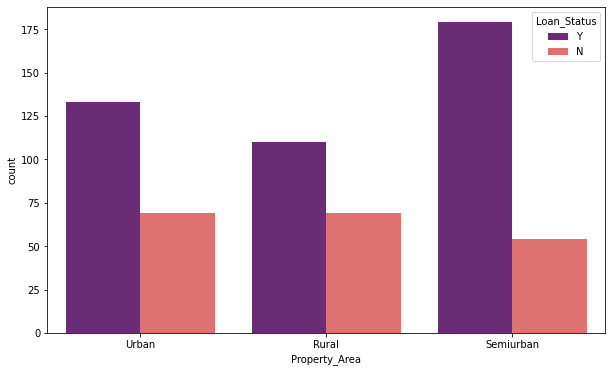

In [47]:
plt.figure(figsize=(10,6))
sns.countplot(x = df['Property_Area'], hue=df['Loan_Status'], palette='magma');

In [48]:
df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Source
count,981,957,978,956,981,926,981.000000,981.000000,954.000000,961.000000,902.000000,981,614,981
unique,981,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2,2
top,LP001055,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y,train
freq,1,775,631,545,763,807,NaN,NaN,NaN,NaN,NaN,349,422,614
mean,NaN,NaN,NaN,NaN,NaN,NaN,5179.795107,1601.916330,142.511530,342.201873,0.835920,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,5695.104533,2718.772806,77.421743,65.100602,0.370553,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,9.000000,6.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2875.000000,0.000000,100.000000,360.000000,1.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3800.000000,1110.000000,126.000000,360.000000,1.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5516.000000,2365.000000,162.000000,360.000000,1.000000,NaN,NaN,NaN


In [49]:
def impute_mode(col):
    df[col].fillna(df[col].mode()[0], inplace = True)

In [50]:
def impute_median(col):
    df[col].fillna(df[col].median(), inplace = True)

In [51]:
impute_mode('Gender')

In [52]:
impute_mode('Married')

In [53]:
impute_mode('Dependents')

In [54]:
impute_mode('Self_Employed')

In [55]:
impute_median('LoanAmount')

In [56]:
impute_mode('Loan_Amount_Term')

In [57]:
impute_mode('Credit_History')

In [58]:
df.isna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Source
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,False,False,False,False,False,False,False,False,False,False,False,False,True,False
363,False,False,False,False,False,False,False,False,False,False,False,False,True,False
364,False,False,False,False,False,False,False,False,False,False,False,False,True,False
365,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [59]:
df.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
Source                 0
dtype: int64

In [60]:
gender = pd.get_dummies(df['Gender'], drop_first=False, prefix='Gen')

married = pd.get_dummies(df['Married'], drop_first=False, prefix='Mar')

edu = pd.get_dummies(df['Education'], drop_first=False, prefix = 'Edu')

emp = pd.get_dummies(df['Self_Employed'], drop_first=False, prefix = 'Emp')

cre = pd.get_dummies(df['Credit_History'], drop_first=False, prefix = 'Cre')

loan = pd.get_dummies(df['Loan_Amount_Term'], drop_first=False, prefix = 'Loan')

area = pd.get_dummies(df['Property_Area'], drop_first=False, prefix = 'Area')

In [61]:
final_df = df.drop(['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term', 'Property_Area'], axis = 1)

In [62]:
final_df = pd.concat([final_df,gender, married, edu, emp, cre, loan, area], axis = 1)

In [63]:
final_df.drop('Loan_ID',axis = 1, inplace =True)

In [64]:
ro = RobustScaler()

In [65]:
scaled = pd.DataFrame(ro.fit_transform(final_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]), index=final_df.index, columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'])

In [66]:
#Concatenating final df and scaled features

final_df = pd.concat([final_df.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Dependents'],axis = 1),scaled], axis = 1)

In [67]:
train_split = final_df[final_df['Source']=='train']

test_split = final_df[final_df['Source'] == 'test']

In [68]:
X_train = train_split.drop(['Loan_Status', 'Source'], axis = 1)

y_train = train_split['Loan_Status']

X_test = test_split.drop(['Loan_Status', 'Source'], axis = 1)

y_test = test_split['Loan_Status']

# Logistics Regression

In [78]:
lg = LogisticRegression()

lg.fit(X_train, y_train)

LogisticRegression()

In [79]:
train_pred = lg.predict(X_train)

test_pred = lg.predict(X_test)

In [80]:
confusion_matrix(y_train, train_pred)

array([[ 85, 107],
       [  9, 413]], dtype=int64)

In [81]:
y_train.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [82]:
accuracy_score(y_train, train_pred)

0.8110749185667753

In [83]:
413/(413+9)

0.9786729857819905

In [84]:
85/(85+107)

0.4427083333333333

In [85]:
85/(85+9)

0.9042553191489362

In [86]:
413/(107+413)

0.7942307692307692

In [87]:
a = 0.90
b=0.44

In [88]:
(2*a*b)/(a+b)

0.591044776119403

In [89]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           N       0.90      0.44      0.59       192
           Y       0.79      0.98      0.88       422

    accuracy                           0.81       614
   macro avg       0.85      0.71      0.74       614
weighted avg       0.83      0.81      0.79       614



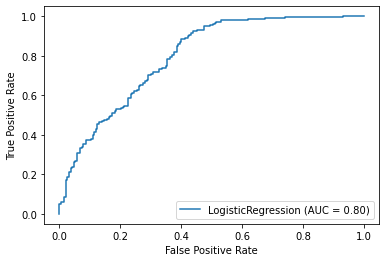

In [90]:
plot_roc_curve(lg,X_train, y_train)

In [91]:
from sklearn.neighbors import KNeighborsClassifier

In [92]:
knn = KNeighborsClassifier(n_neighbors=30,n_jobs=-1)

In [93]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=30)

In [94]:
train_pred_knn = knn.predict(X_train)

In [95]:
confusion_matrix(y_train, train_pred_knn)

array([[ 54, 138],
       [  5, 417]], dtype=int64)

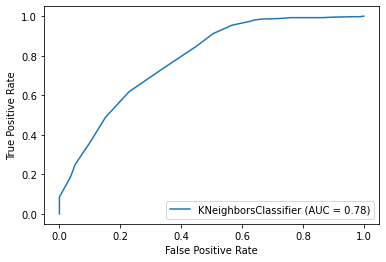

In [96]:
plot_roc_curve(knn, X_train, y_train);

In [97]:
test_pred_knn = knn.predict(X_test)

In [99]:
sample_df['Loan_Status'] = test_pred_knn

sample_df.to_csv('KNN model_30.csv', index = False)

ValueError: Length of values (367) does not match length of index (233599)

In [100]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_train)
    error_rate.append(np.mean(pred_i != y_train))

Text(0, 0.5, 'Error Rate')

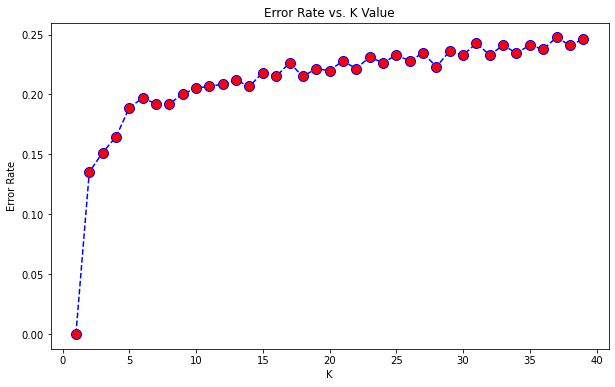

In [101]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [102]:
from sklearn.naive_bayes import GaussianNB

In [103]:
gb = GaussianNB()

In [104]:
gb.fit(X_train, y_train)

GaussianNB()

In [105]:
train_pred_gb = gb.predict(X_train)

test_pred_gb = gb.predict(X_test)

In [106]:
confusion_matrix(y_train, train_pred_gb)

array([[190,   2],
       [410,  12]], dtype=int64)

In [107]:
print(classification_report(y_train, train_pred_gb))

              precision    recall  f1-score   support

           N       0.32      0.99      0.48       192
           Y       0.86      0.03      0.06       422

    accuracy                           0.33       614
   macro avg       0.59      0.51      0.27       614
weighted avg       0.69      0.33      0.19       614



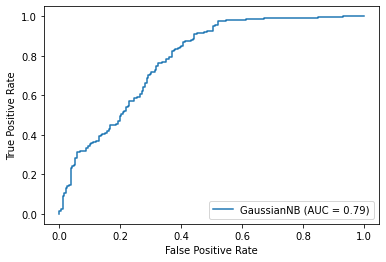

In [108]:
plot_roc_curve(gb, X_train, y_train)

In [114]:
#test_pred_sm = sm.predict(X_test)

In [115]:
sample_df['Loan_Status'] = test_pred_sm

sample_df.to_csv('Loan__prediction.csv', index = False)

NameError: name 'test_pred_sm' is not defined